# Transfer learning

In [1]:
import tensorflow as tf
import numpy as np
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def cats_vs_dogs_annotations(file_path):
    annotations = {}
    
    with open(file_path, 'r') as f:
        rows = f.read().splitlines()

    for i, row in enumerate(rows):
        image_name, _, _, _ = row.split(' ')
        image_name += '.jpg'
        if image_name[0].lower() != image_name[0]:
            class_name = 'cat'
        else:
            class_name = 'dog'
        annotations[image_name] = class_name
    
    return annotations, i + 1

In [3]:
train_annot, count_train = cats_vs_dogs_annotations('annotations/trainval.txt')
test_annot, count_test = cats_vs_dogs_annotations('annotations/test.txt')

In [4]:
train_annot

{'Abyssinian_100.jpg': 'cat',
 'Abyssinian_101.jpg': 'cat',
 'Abyssinian_102.jpg': 'cat',
 'Abyssinian_103.jpg': 'cat',
 'Abyssinian_104.jpg': 'cat',
 'Abyssinian_105.jpg': 'cat',
 'Abyssinian_106.jpg': 'cat',
 'Abyssinian_107.jpg': 'cat',
 'Abyssinian_108.jpg': 'cat',
 'Abyssinian_109.jpg': 'cat',
 'Abyssinian_10.jpg': 'cat',
 'Abyssinian_110.jpg': 'cat',
 'Abyssinian_111.jpg': 'cat',
 'Abyssinian_112.jpg': 'cat',
 'Abyssinian_113.jpg': 'cat',
 'Abyssinian_114.jpg': 'cat',
 'Abyssinian_115.jpg': 'cat',
 'Abyssinian_116.jpg': 'cat',
 'Abyssinian_117.jpg': 'cat',
 'Abyssinian_118.jpg': 'cat',
 'Abyssinian_119.jpg': 'cat',
 'Abyssinian_11.jpg': 'cat',
 'Abyssinian_120.jpg': 'cat',
 'Abyssinian_121.jpg': 'cat',
 'Abyssinian_122.jpg': 'cat',
 'Abyssinian_123.jpg': 'cat',
 'Abyssinian_124.jpg': 'cat',
 'Abyssinian_125.jpg': 'cat',
 'Abyssinian_126.jpg': 'cat',
 'Abyssinian_127.jpg': 'cat',
 'Abyssinian_128.jpg': 'cat',
 'Abyssinian_129.jpg': 'cat',
 'Abyssinian_12.jpg': 'cat',
 'Abyssinian_

In [5]:
test_annot

{'Abyssinian_201.jpg': 'cat',
 'Abyssinian_202.jpg': 'cat',
 'Abyssinian_204.jpg': 'cat',
 'Abyssinian_205.jpg': 'cat',
 'Abyssinian_206.jpg': 'cat',
 'Abyssinian_207.jpg': 'cat',
 'Abyssinian_20.jpg': 'cat',
 'Abyssinian_210.jpg': 'cat',
 'Abyssinian_212.jpg': 'cat',
 'Abyssinian_213.jpg': 'cat',
 'Abyssinian_215.jpg': 'cat',
 'Abyssinian_216.jpg': 'cat',
 'Abyssinian_217.jpg': 'cat',
 'Abyssinian_219.jpg': 'cat',
 'Abyssinian_21.jpg': 'cat',
 'Abyssinian_220.jpg': 'cat',
 'Abyssinian_221.jpg': 'cat',
 'Abyssinian_223.jpg': 'cat',
 'Abyssinian_224.jpg': 'cat',
 'Abyssinian_225.jpg': 'cat',
 'Abyssinian_226.jpg': 'cat',
 'Abyssinian_228.jpg': 'cat',
 'Abyssinian_22.jpg': 'cat',
 'Abyssinian_230.jpg': 'cat',
 'Abyssinian_232.jpg': 'cat',
 'Abyssinian_24.jpg': 'cat',
 'Abyssinian_25.jpg': 'cat',
 'Abyssinian_26.jpg': 'cat',
 'Abyssinian_27.jpg': 'cat',
 'Abyssinian_29.jpg': 'cat',
 'Abyssinian_2.jpg': 'cat',
 'Abyssinian_30.jpg': 'cat',
 'Abyssinian_31.jpg': 'cat',
 'Abyssinian_32.jpg': 

In [6]:
count_train

3680

In [7]:
count_test

3669

In [8]:
class_to_index = {'cat': 0, 'dog': 1}
index_to_class = {0: 'cat', 1: 'dog'}

In [9]:
class_to_index

{'cat': 0, 'dog': 1}

In [10]:
index_to_class

{0: 'cat', 1: 'dog'}

In [11]:
image_dir = 'images/'

def random_batch(annot, batch_size=4):
    all_keys = list(annot.keys())
    total_examples = len(all_keys)
    indices = np.random.choice(range(total_examples), batch_size)
    x = np.zeros((batch_size, 128, 128, 3))
    y = np.zeros((batch_size, 1))
    images = []
    
    for i, index in enumerate(indices):
        image = tf.keras.preprocessing.image.load_img(os.path.join(image_dir, all_keys[index]),
                                                     target_size=(128, 128))
        images.append(image)
        arr = tf.keras.preprocessing.image.img_to_array(image)
        arr = tf.keras.applications.mobilenet_v2.preprocess_input(arr)
        arr = np.expand_dims(arr, axis=0)
        x[i] = arr
        y[i] = class_to_index[annot[all_keys[index]]]
    
    return x, y, images

In [12]:
def display_examples(x, y, p, images, index_to_class):

    print('Displaying first 10 examples..')

    if len(images) < 8:
        print('Need at least 10 examples')
        return None

    plt.figure(figsize=(12, 8))
    for i in range(8):
        plt.subplot(2, 4, i + 1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        gt = int(np.squeeze(y[i]) > 0.5)
        pred = int(np.squeeze(p[i]) > 0.5)
        col = 'green' if gt == pred else 'red'
        plt.xlabel(index_to_class[pred], color=col)
    return plt

Displaying first 10 examples..


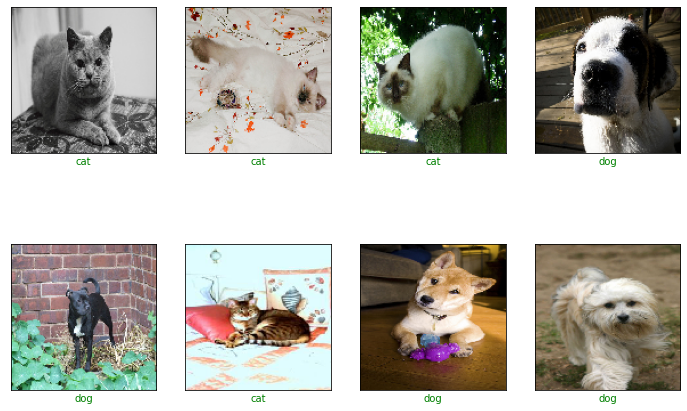

In [13]:
x, y, images = random_batch(train_annot, batch_size=10)
display_examples(x, y, y, images, index_to_class).show()

# create model

In [14]:
mnet = tf.keras.applications.mobilenet_v2.MobileNetV2(include_top=False, input_shape=(128, 128, 3),
                                                     pooling='avg', weights='imagenet')
mnet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [15]:
def create_model():
    model = tf.keras.models.Sequential([
        mnet,
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.layers[0].trainable = False
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
    return model

In [16]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1281      
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


# Train model

In [17]:
def data_generator(batch_size, annot):
    while True:
        x, y, _ = random_batch(annot, batch_size)
        yield (x, y)

In [18]:
batch_size = 32
steps_per_epoch = int(len(list(train_annot.keys()))/batch_size)
validation_steps = int(len(list(test_annot.keys()))/batch_size)

print('Steps per epoch:', steps_per_epoch)
print('Validation steps:', validation_steps)

Steps per epoch: 115
Validation steps: 114


In [19]:
_ = model.fit_generator(
    data_generator(batch_size, train_annot),
    validation_data=data_generator(batch_size, test_annot),
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    epochs=1
)

Instructions for updating:
Please use Model.fit, which supports generators.
115/115 [==============================] - 244s 2s/step - loss: 0.2581 - acc: 0.8984 - val_loss: 0.1102 - val_acc: 0.9646


# Predictions

Displaying first 10 examples..


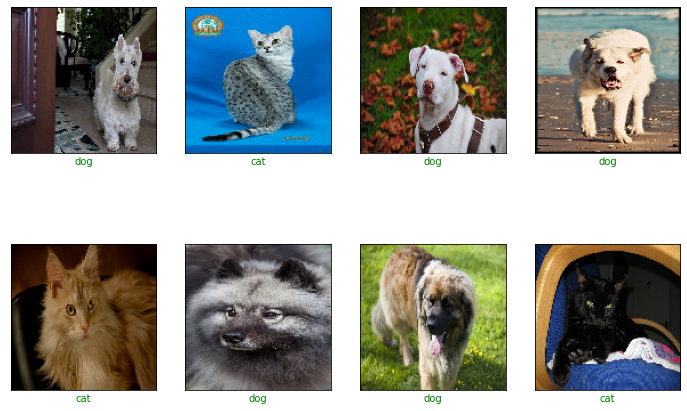

In [20]:
x, y, images = random_batch(test_annot, batch_size=10)
preds = model.predict(x)
display_examples(x, y, preds, images, index_to_class).show()